In [16]:
import numpy as np
import pandas as pd
import seaborn as sbn
import os

In [17]:
#declare base directories subfolder
base='C:/Users/Phil/Box Sync/Boorman Lab/Experiments/Latent-Learning/Behavioral Data'
run=7
data_dir=os.path.join(base, 'Run '+str(run))
print (data_dir)

C:/Users/Phil/Box Sync/Boorman Lab/Experiments/Latent-Learning/Behavioral Data\Run 7


In [32]:
#load all csvs into a list of dataframe for easy concatornation
dats=[pd.read_csv(os.path.join(data_dir, k)) for k in os.listdir(data_dir) if 'LTR_Task.csv' in k]
daters=pd.concat(dats)

#check to ensure all elements are in contonated df
print(daters.size == np.sum([l.size for l in dats]))

True


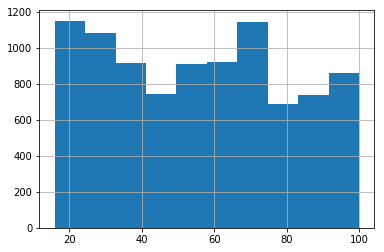

In [64]:
#bin magitute difference scores so we can average RT
daters['magDiff']=np.abs(daters['O1_reward']-daters['O2_reward'])

#histogram to look at the distributions to apply appropriate cutting 
daters['magDiff'].hist()

bins=np.arange(0,1.2, .2)
bin_labels=np.arange(1, len(bins))

daters['magDiffBins']=pd.qcut(daters['magDiff'], bins, labels=bin_labels)

In [74]:
rt_means=daters.groupby(['PAR', 'magDiffBins'], as_index=False)['Res_time'].mean()
print(rt_means)

       PAR magDiffBins  Res_time
0     FB69           1  1.180503
1     FB69           2  1.259139
2     FB69           3  1.299196
3     FB69           4  1.244212
4     FB69           5  1.257325
5     FH62           1  0.642173
6     FH62           2  0.675007
7     FH62           3  0.738893
8     FH62           4  0.661080
9     FH62           5  0.696025
10    GA70           1  1.714180
11    GA70           2  1.485957
12    GA70           3  1.461152
13    GA70           4  1.578318
14    GA70           5  1.586304
15    HR64           1  0.925837
16    HR64           2  0.628306
17    HR64           3  0.942201
18    HR64           4  0.876067
19    HR64           5  0.616947
20    JA63           1  1.693466
21    JA63           2  1.502679
22    JA63           3  1.602142
23    JA63           4  1.487773
24    JA63           5  1.568811
25    JM74           1  0.723175
26    JM74           2  0.678611
27    JM74           3  0.844530
28    JM74           4  0.587581
29    JM74

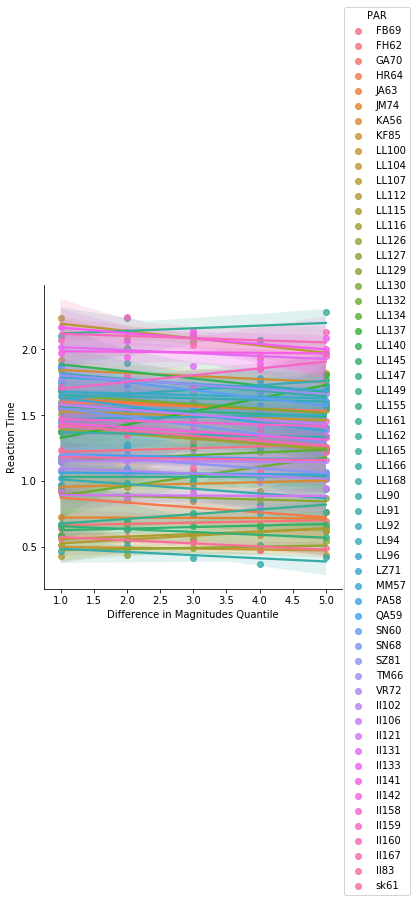

In [82]:
# plot reaction as a function of Magnitude difference quantile
g = sbn.lmplot(x="magDiffBins", y="Res_time", hue='PAR',
               truncate=True, size=5, data=rt_means)
g.set_axis_labels("Difference in Magnitudes Quantile", "Reaction Time")
